# Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest, exponnorm

In [2]:
# Import helper functions
from util import simulate_trials_fixed_SSD, inhibit_log_likelihood_numeric_approximation, exgaussian_pdf, exgaussian_cdf

# Simulate data (based on single, fixed parameters)

In [3]:
N = 100000  # number of simulations
T = 50  # total number of trials

trial_type_sequence = ["go", "go", "go", "go", "stop"] * 10
fixed_ssd_set = [80, 160, 240, 320, 400, 480]

# Define fixed parameters
mu_go = 500
sigma_go = 100
tau_go = 150
mu_stop = 400
sigma_stop = 75
tau_stop = 150
p_tf = 0.2

In [4]:
all_trials = []

# Run simulation based on the type of SSD specified
for i in range(N):
    participant_id = i + 1  # Participant identifier
    
    # Simulate fixed SSD dataset
    trial_df = simulate_trials_fixed_SSD(
        trial_type_sequence, fixed_ssd_set, p_tf, 
        mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop
    )

    trial_df['participant_id'] = participant_id
    all_trials.append(trial_df)

simulated_data = pd.concat(all_trials, ignore_index=True)

In [5]:
simulated_data.describe()

,ssd,observed_rt,ss_rt,participant_id
count,1000000.000000,4.801275e+06,1000000.000000,5.000000e+06
mean,279.914000,6.430957e+02,550.093764,5.000050e+04
std,136.707004,1.760427e+02,167.556219,2.886752e+04
min,80.000000,2.861685e+01,81.877295,1.000000e+00
25%,160.000000,5.250726e+02,437.539658,2.500075e+04
50%,240.000000,6.180780e+02,518.362488,5.000050e+04
75%,400.000000,7.310286e+02,626.653023,7.500025e+04
max,480.000000,2.768729e+03,2274.990884,1.000000e+05


# Go Trials

For go trials, the main objective is to examine whether the **observed response time (i.e., go RT)** follows the ex-gaussian distribution specified by the given, fixed parameters.

In [6]:
go_rt = simulated_data[simulated_data['trial_type'] == 'go']['observed_rt']

In [7]:
# Perform Goodness-of-Fit Test between observed RT and theoretical ex-gaussian distribution
def exgaussian_goodness_of_fit(data, mu, sigma, tau):
    k = tau / sigma
    params = (k, mu, sigma)
    ks_stat, p_value = kstest(data, lambda x: exponnorm.cdf(x, *params))
    return ks_stat, p_value

A p-value larger than 0.05 to indicate that the null hypothesis (that the data follows the specified distribution) cannot be rejected. In other words, a p-value greater than 0.05 suggests that your data reasonably follows the Ex-Gaussian distribution.  

In [8]:
_, p_go = exgaussian_goodness_of_fit(go_rt, mu_go, sigma_go, tau_go)
print(f"Go-RT Ex-Gaussian fit p-value: {p_go}") 

Go-RT Ex-Gaussian fit p-value: 0.7782850874995731


Plot theoretical pdf versus observed histogram (pdf):

In [9]:
def plot_exgaussian_comparison(data, mu, sigma, tau):
    '''
    Plot the histogram of simulated data and compare it with the theoretical Ex-Gaussian PDF.

    Inputs:
        1) data: array-like, the simulated data
        2) mu: mean of the Gaussian component
        3) sigma: standard deviation of the Gaussian component
        4) tau: mean (or rate parameter) of the exponential component
    '''
    # Plot the histogram and KDE of the simulated data
    ax = sns.histplot(data, kde=True, stat='density', color='blue', label='Simulated Data')
    x_limits = ax.get_xlim()
    x_ticks = ax.get_xticks()
    x_interval = (x_ticks[-1] - x_ticks[0]) / (len(x_ticks) - 1)

    print("X-axis limits:", x_limits)
    print("Interval for x axis values:", x_interval)

    # Calculate the theoretical PDF of the Ex-Gaussian distribution
    x = np.linspace(x_limits[0], x_limits[-1], 1000)
    k = tau / sigma
    pdf_theoretical = exponnorm.pdf(x, K=k, loc=mu, scale=sigma)

    # Clear the current plot
    plt.clf()

    # Plot the histogram and theoretical PDF
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, stat='density', color='blue', label='Simulated Data')
    plt.plot(x, pdf_theoretical, 'r-', lw=2, label='Theoretical PDF')
    plt.title('Comparison of Simulated Data and Theoretical Ex-Gaussian PDF')
    plt.xlabel('Reaction Time (ms)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

/Users/samcong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


X-axis limits: (-108.38877972666683, 2905.735118906514)
Interval for x axis values: 500.0


/Users/samcong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

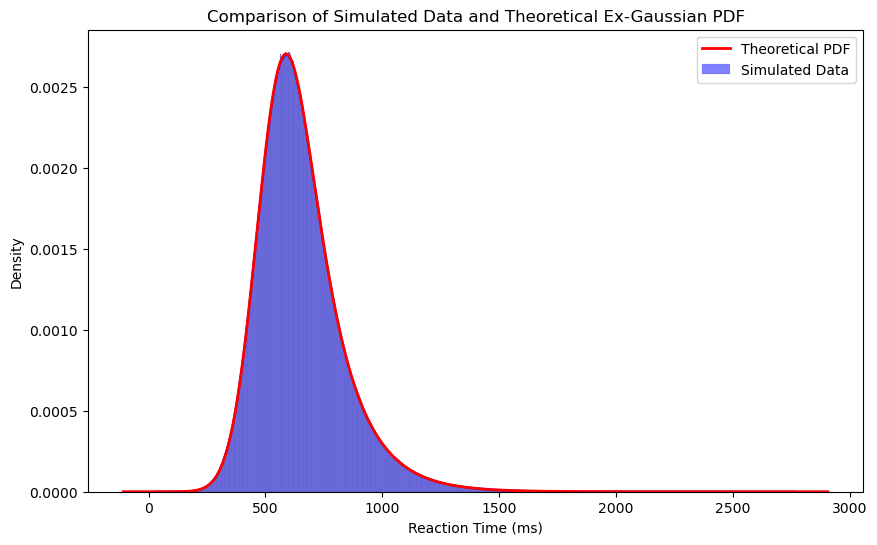

In [10]:
plot_exgaussian_comparison(go_rt, mu_go, sigma_go, tau_go)

# Stop Trials

## Stop Respond

For those stop trials where participants responded (unsuccessful inhibition), the two objectives are 1) examining whether **ss_rt** follows the ex-gaussian distribution specified by the given, fixed parameters and 2) examining whether **observed response time (i.e., go RT)** follows the ex-gaussian distribution specified by the given, fixed parameters.

In [11]:
# ss-rt equals to the observed response time minus SSD
ss_rt = simulated_data[simulated_data ['outcome'] == 'stop-respond']['ss_rt']

Plot theoretical pdf versus observed histogram (pdf):

/Users/samcong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


X-axis limits: (-13.324197571217354, 2383.958268715983)
Interval for x axis values: 500.0


/Users/samcong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

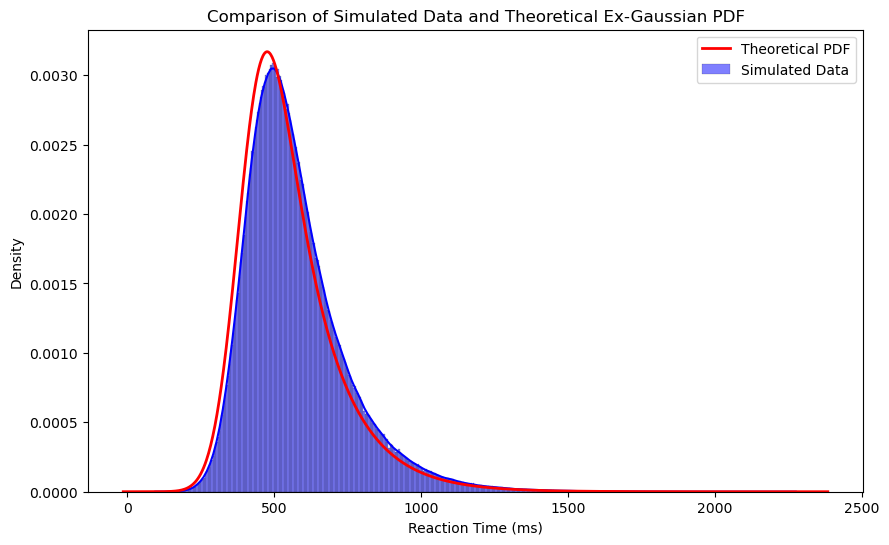

In [12]:
plot_exgaussian_comparison(ss_rt, mu_stop, sigma_stop, tau_stop)

In [13]:
# ss-rt equals to the observed response time minus SSD
go_rt_ss = simulated_data[simulated_data ['outcome'] == 'stop-respond']['observed_rt']

/Users/samcong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


X-axis limits: (-47.78842809894421, 2428.8455438771757)
Interval for x axis values: 500.0


/Users/samcong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

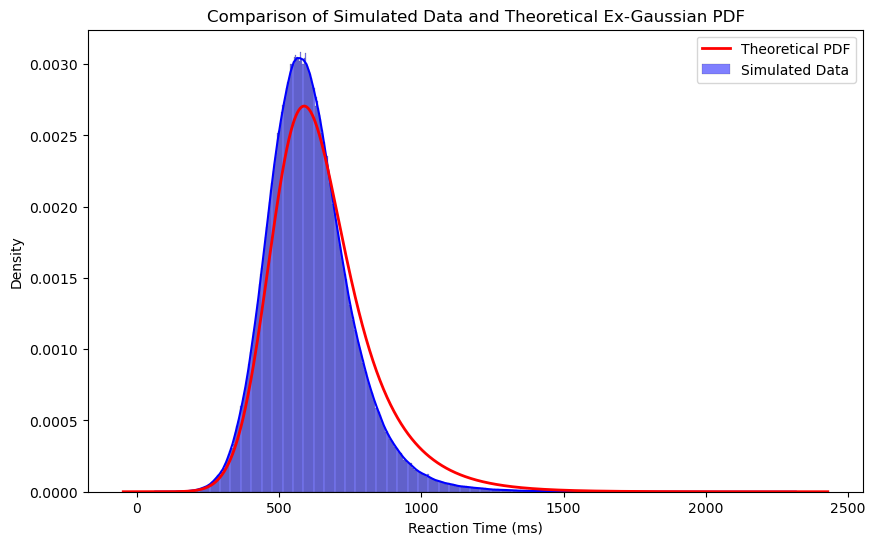

In [14]:
plot_exgaussian_comparison(go_rt_ss, mu_go, sigma_go, tau_go)

## Successful Inhibition

For successful inhibition trials, the main goal is to examine whether the theoretical (analytical) proportion of successful inhibition trials equals to the observed proportion of successful inhibition trials among stop trials.

First, I tried the analytical solution (see `simulate_trials_fixed_SSD` function in `util.py`) based on $P(TF)$ (strictly speaking, $1 - P(TF)$) and the probability of $go RT > SSRT + SSD$.

In [15]:
def calculate_successful_inhibition_proportion(mu_go, sigma_go, tau_go, 
                                               mu_stop, sigma_stop, tau_stop, 
                                               p_tf, SSD, upper_bound, n=1000):
    successful_inhibition_probs = []
    
    for ssd in SSD:
        # Generate a range of ssrt values for integration
        ssrt_values = np.linspace(0, upper_bound, n)
        ssrt_pdf = exgaussian_pdf(ssrt_values, mu_stop, sigma_stop, tau_stop)
        
        # Calculate the CDF of go_rt at (ssrt + ssd) for each ssrt
        go_rt_cdf_values = exgaussian_cdf(ssrt_values + ssd, mu_go, sigma_go, tau_go)
        prob_go_rt_greater = 1 - go_rt_cdf_values
        
        # Integrate over the distribution of ssrt
        integral = np.sum(prob_go_rt_greater * ssrt_pdf) * (upper_bound / n)
        
        # Probability of successful inhibition
        prob_successful_inhibition = (1 - p_tf) * integral
        successful_inhibition_probs.append(prob_successful_inhibition)
    
    # Average proportion of successful inhibition
    average_successful_inhibition_proportion = np.mean(successful_inhibition_probs)
    
    return average_successful_inhibition_proportion

In [16]:
'''
A toy example of one single participant
'''

# Retrieve the subset of that (simulated) participant's data
data = simulated_data.loc[0*T:(0+1)*T-1]

# Retrieve the array of ssd (for stop trials)
ssd_array = data.ssd[~data.ssd.isna()]

upper_bound = max(data.observed_rt) + 200

theoretical_proportion = calculate_successful_inhibition_proportion(
    mu_go, sigma_go, tau_go, 
    mu_stop, sigma_stop, tau_stop, 
    p_tf, ssd_array, upper_bound
)

print("Theoretical/Analytical Proportion of Successful Inhibition Trials:", theoretical_proportion)

observed_proportion = len(data[data['outcome'] == 'successful inhibition']) / len(ssd_array)
print("Observed Proportion of Successful Inhibition Trials:", observed_proportion)

Theoretical/Analytical Proportion of Successful Inhibition Trials: 0.18816295616242623
Observed Proportion of Successful Inhibition Trials: 0.0


In [17]:
successful_inhibition_proportions = []
for i in range(N):
    # Retrieve the subset of that (simulated) participant's data
    data = simulated_data.loc[i*T:(i+1)*T-1]

    # Set upper bound for numerical integration using gauss legendre quadrature rule
    upper_bound = max(data.observed_rt) + 200

    # Retrieve the array of ssd (for stop trials)
    ssd_array = data.ssd[~data.ssd.isna()]

    # Calculate log-likelihood of successful inhibition for each (simulated) participant
    proportion = calculate_successful_inhibition_proportion(
        mu_go, sigma_go, tau_go, 
        mu_stop, sigma_stop, tau_stop,
        p_tf, ssd_array, upper_bound
    )
    
    successful_inhibition_proportions.append(proportion)

# Calculate the theoretical proportion of successful inhibition trials
theoretical_proportion = np.mean(successful_inhibition_proportions)
print("Theoretical/Analytical Proportion of Successful Inhibition Trials:", theoretical_proportion)

# Calculate the observed proportion across all simulated participants
observed_proportion = len(simulated_data[simulated_data['outcome'] == 'successful inhibition']) / len(simulated_data[simulated_data['trial_type'] == 'stop'])
average_successful_inhibition_proportion = np.mean(successful_inhibition_proportions)
print("Observed Proportion of Successful Inhibition Trials:", observed_proportion )

Theoretical/Analytical Proportion of Successful Inhibition Trials: 0.19885235408251686
Observed Proportion of Successful Inhibition Trials: 0.198725


Then, I tried calculating the log-likelihood for one round of trials averaged across all simulated participants.

In [19]:
log_likelihoods = []
for i in range(N):
    # Retrieve the subset of that (simulated) participant's data
    data = simulated_data.loc[i*T:(i+1)*T-1]

    # Set upper bound for numerical integration using gauss legendre quadrature rule
    upper_bound = max(data.observed_rt) + 200

    # Retrieve the array of ssd (for stop trials with successful inhibition)
    ssd_array = data.ssd[(~data.ssd.isna()) & (data.observed_rt.isna())]

    # Calculate log-likelihood of successful inhibition for each (simulated) participant
    log_likelihood = inhibit_log_likelihood_numeric_approximation(
        mu_go, sigma_go, tau_go, 
        mu_stop, sigma_stop, tau_stop,
        p_tf, upper_bound, ssd_array
    )
    log_likelihoods.append(log_likelihood)

# Calculate the average log-likelihood
average_log_likelihood = np.mean(log_likelihoods)
print("Average Log-Likelihood for Successful Inhibition Trials:", average_log_likelihood)

Average Log-Likelihood for Successful Inhibition Trials: -2.7445070220678347


In [26]:
print("Average Likelihood for Successful Inhibition Trials:", np.exp(average_log_likelihood))

Average Likelihood for Successful Inhibition Trials: 1.3963735511537653e-23
